# Practical Session 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
ds = pd.read_csv('kaggle_houseprices_modified.csv')

ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   198075.0  
1   2007        WD         Normal   199650.0  
2   2008        WD         Normal   212325.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   237500.0  

[5 rows x 81 columns]

In [4]:
ds.shape

(1460, 81)

In [5]:
drop = ['Id']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

In [6]:
logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
for col in logical_nans:
    ds[col] = ds[col].fillna('NA')
    
ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # mode
print(ds[categorical].isna().sum().sum())

0


In [7]:
ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())
ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
print(ds[continuous].isna().sum().sum())

0


In [8]:
ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')

logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in logical_nans:
    ds[col] = ds[col].fillna('NA')

In [9]:
ds.drop(columns = ['PoolQC'], inplace=True)
cat_to_con.remove('PoolQC')

In [10]:
target = 'SalePrice'
for col in categorical:
    ds[col] = ds.groupby([col])[target].transform('mean')

In [11]:
grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
for col in grp1:
    ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})
    
for col in ['BsmtFinType1', 'BsmtFinType2']:
    ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

### Scaling

-- discussion on scaling
- When to scale?
- prefered scaler

In [12]:
scaler = StandardScaler()   # I have not followed above discussion
ds_scaled = scaler.fit_transform(ds)

### Cross Val Split - manual

In [13]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

31459.13903729617


In [14]:
fi = pd.DataFrame()
fi['features'] = ds.columns[:-1]
fi['importance'] = baseline_estimator.feature_importances_
fi.sort_values(by='importance', ascending=False)

features  importance
77      SaleType    0.282289
17   OverallQual    0.253465
46     GrLivArea    0.117702
61    GarageCars    0.079363
12  Neighborhood    0.063264
..           ...         ...
11     LandSlope    0.000000
65    PavedDrive    0.000000
6          Alley    0.000000
56    Fireplaces    0.000000
39       Heating    0.000000

[79 rows x 2 columns]

In [15]:
mape(y_true, y_pred)

0.10215612963536726

<AxesSubplot:ylabel='Density'>

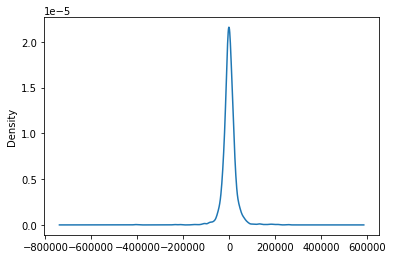

In [16]:
pd.Series(y_true - y_pred).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

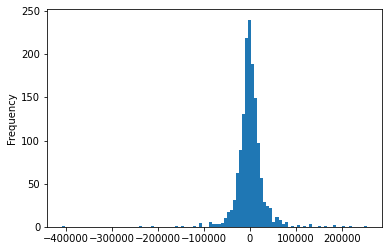

In [17]:
pd.Series(y_true - y_pred).plot(kind='hist', bins=100)

Have you guys tired checking distibutions ?

In [18]:
pd.Series(y_true).describe()

count      1460.000000
mean     193784.766473
std      103896.507717
min       20940.000000
25%      139060.625000
50%      170500.000000
75%      223625.000000
max      917485.500000
dtype: float64

In [19]:
pd.Series(y_pred).describe()

count      1460.000000
mean     193638.076371
std       97502.711088
min       22527.805179
25%      139421.494786
50%      169002.287859
75%      220449.313841
max      720960.494214
dtype: float64

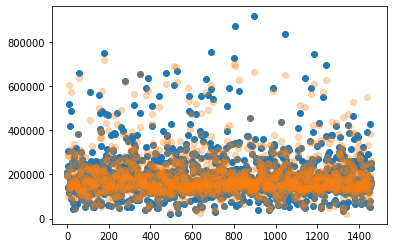

In [20]:
plt.scatter(range(len(y_true)), y_true)
plt.scatter(range(len(y_true)), y_pred, alpha=0.3)

<AxesSubplot:ylabel='Density'>

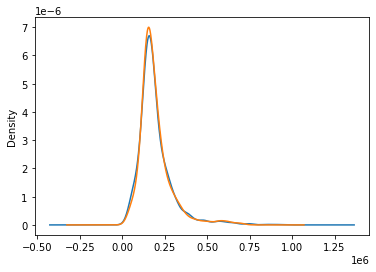

In [21]:
pd.Series(y_true).plot(kind='kde')
pd.Series(y_pred).plot(kind='kde')

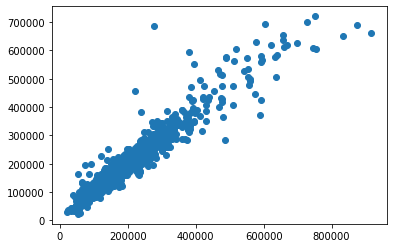

In [22]:
plt.scatter(y_true, y_pred)

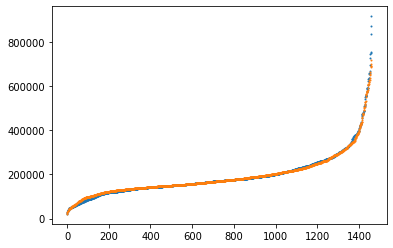

In [23]:
plt.scatter(range(len(y_true)), sorted(y_true), s=1)
plt.scatter(range(len(y_true)), sorted(y_pred), s=1)

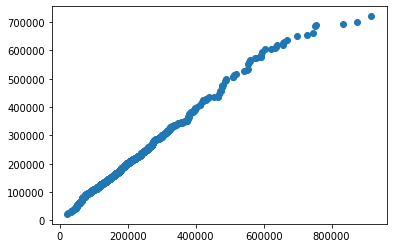

In [24]:
plt.scatter(sorted(y_true), sorted(y_pred))

**Please check feature importances aswell**

### Dimensionality Reduction

How many components to keep?

In [25]:
from sklearn.decomposition import PCA

cs = [5, 10, 15, 20, 30, 50, 75]
info = []
for i in cs:
    pca = PCA(n_components=i)
    vis = pca.fit_transform(ds_scaled[:, :-1])
    info.append(pca.explained_variance_ratio_.sum())

Familiar plot ahead

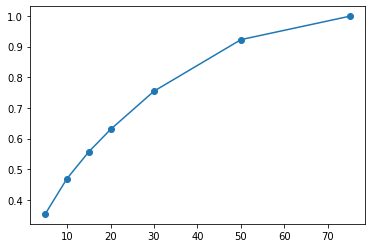

In [26]:
plt.plot(cs, info, '-o')

In [27]:
pca = PCA(n_components=60)

Xpca = pca.fit_transform(ds_scaled[:, :-1])
y = ds['SalePrice']

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

35904.04321071159
0.11143077762447495


PCA-did not work -- instead
feature selection + feature engineering

forward feature selection??

## Visualisation

In [29]:
pca.explained_variance_ratio_.sum()

0.9673613685406947

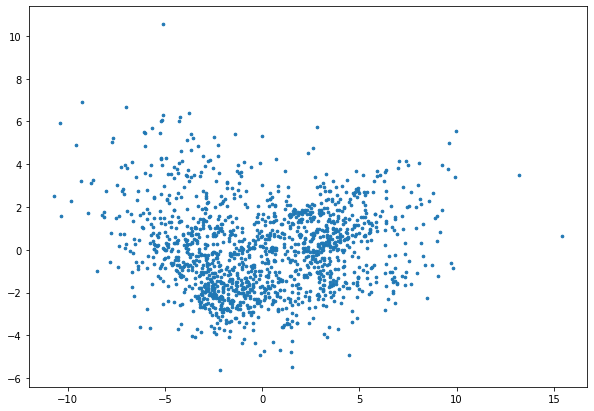

In [30]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10,7))
pca = PCA(n_components=2)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:,0], vis[:,1], s=7)

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


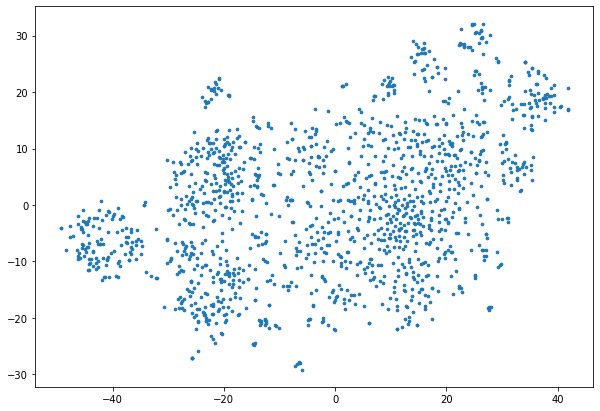

In [31]:
from sklearn.manifold import TSNE

plt.figure(figsize=(10,7))
pca = TSNE(n_components=2, perplexity=50, random_state=0)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:,0], vis[:,1], s=7)

4, 7 ??

Elbow method
- For each cluster I will train a new model (ensemble - 4d) [Complexity]
- Shape ????
- Divide 7 cluster -- not equal size - -smaller cluswill have very points !! - train test-- test set will small !!!!

In [33]:
ds.shape

(1460, 80)

## Outliers

In [34]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

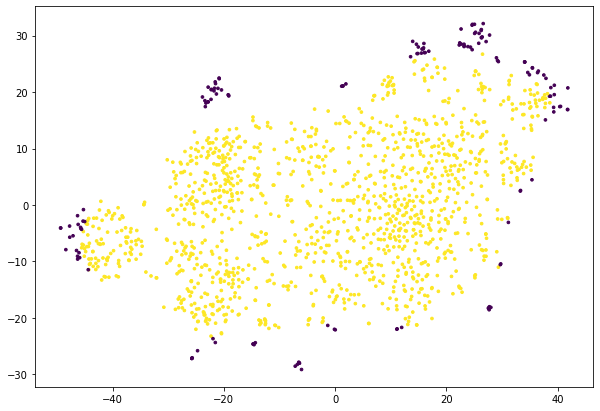

In [35]:
plt.figure(figsize=(10,7))
is_outlier = IsolationForest(contamination = 0.10, random_state=0, n_estimators=100).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

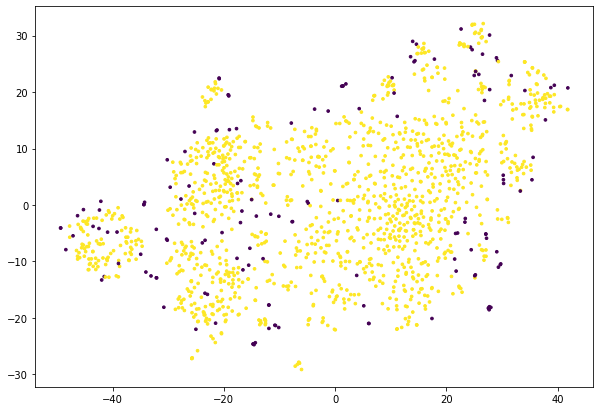

In [36]:
plt.figure(figsize=(10,7))
is_outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.10).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

How to validate

- % of outlier - 15%, 10% -- 5%
- n_neighbours - ??

Manual EDA on these outlier -- ???

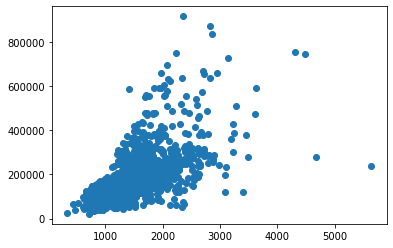

In [37]:
plt.scatter(ds['GrLivArea'], ds['SalePrice'])

## Clustering

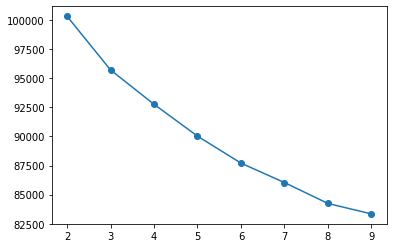

In [38]:
from sklearn.cluster import KMeans

elbow = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ds_scaled[:, :-1])
    elbow.append(kmeans.inertia_)
    
plt.plot(range(2,10), elbow,'-o')

Text(0, 0.5, 'distance')

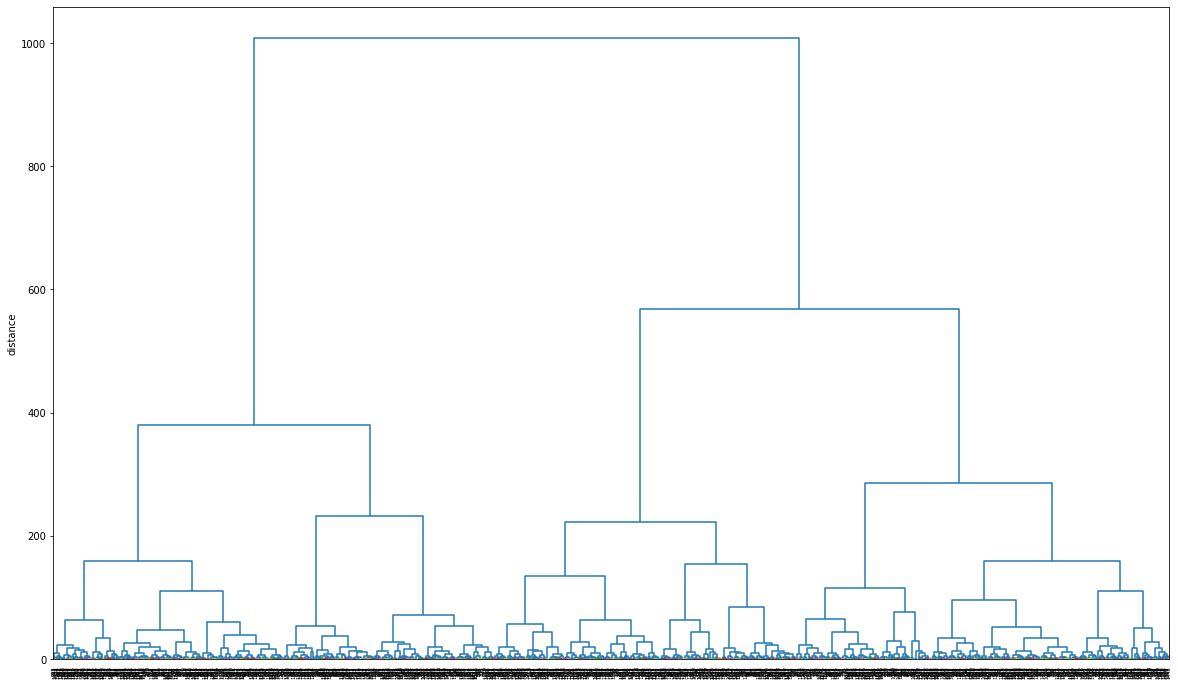

In [39]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(vis, method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

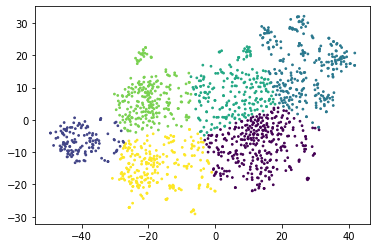

In [40]:
kmeans = KMeans(n_clusters=6)
# kmeans.fit(ds_scaled[:, :-1])
kmeans.fit(vis)

plt.scatter(vis[:,0], vis[:,1], s=3, c=kmeans.labels_)

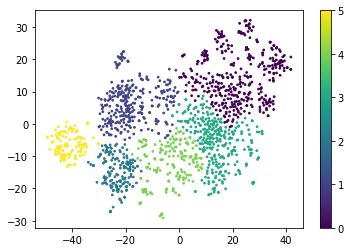

In [41]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(vis)  #ds_scaled[:, :-1]
plt.scatter(vis[:,0], vis[:,1], s=3, c=aglo.labels_)
plt.colorbar()

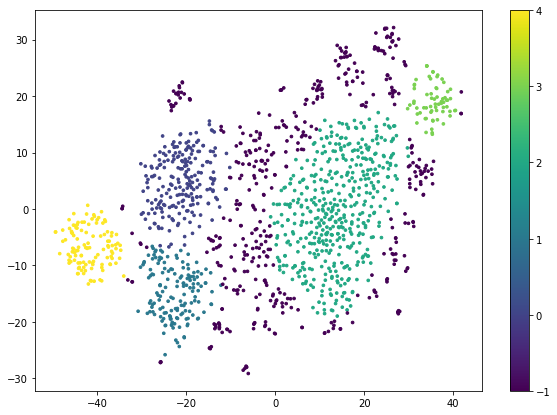

In [42]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 5.5, min_samples = 55).fit(vis)
plt.figure(figsize=(10,7))
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

In [43]:
pd.Series(dbsc.labels_).value_counts()

 2    464
-1    452
 0    212
 1    150
 4    115
 3     67
dtype: int64

**Baseline without outliers**

In [101]:
dbsc.labels_.shape

(1460,)

In [105]:
ds.loc[dbsc.labels_==3].head()

Id     MSSubClass       MSZoning  LotFrontage  LotArea         Street  \
48   49  116899.333333  129102.439908         33.0     4456  194047.191231   
78   79  122604.346154  204994.032276         72.0    10778  194047.191231   
88   89  150141.173611   73276.870000        105.0     8470  194047.191231   
89   90  207766.905970  204994.032276         60.0     8070  194047.191231   
99  100  207766.905970  204994.032276         77.0     9320  194047.191231   

            Alley       LotShape    LandContour      Utilities  ...  \
48  196590.593755  176882.391676  193292.650229  193813.919842  ...   
78  196590.593755  176882.391676  193292.650229  193813.919842  ...   
88  196590.593755  219936.183574  193292.650229  193813.919842  ...   
89  196590.593755  176882.391676  193292.650229  193813.919842  ...   
99  196590.593755  219936.183574  193292.650229  193813.919842  ...   

    ScreenPorch  PoolArea          Fence    MiscFeature  MiscVal  \
48            0         0  201832.730831  195275.313691        0   
78            0         0  201832.730831  195275.313691        0   
88            0         0  155835.051592  195275.313691        0   
89            0         0  201832.730831  195275.313691        0   
99            0         0  201832.730831  154880.979592      400   

           MoSold  YrSold       SaleType  SaleCondition  SalePrice  
48  185036.365613    2009  406700.434426  400976.648000    67800.0  
78  181148.804255    2010  175316.452684  177454.242947    81900.0  
88  203830.971910    2009  134396.444444  146527.787129    51000.0  
89  200841.786885    2007  175316.452684  177454.242947    74160.0  
99  199507.381034    2010  175316.452684  177454.242947    77370.0  

[5 rows x 80 columns]

In [44]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = ds['SalePrice'].values[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

30090.04748974263 0.09577201171782089


In [45]:
outliers_X = ds_scaled[dbsc.labels_==-1][:, :-1]
outliers_y = ds[dbsc.labels_==-1]['SalePrice'].values
mse(outliers_y, baseline_estimator.predict(outliers_X))**0.5

47000.26792120169

In [46]:
mape(outliers_y, baseline_estimator.predict(outliers_X))

0.16441057841903559

---

In [106]:
pd.Series(dbsc.labels_).value_counts()

 2    464
-1    452
 0    212
 1    150
 4    115
 3     67
dtype: int64

### Cluster wise baseline

In [107]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = ds['SalePrice'].values[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0
for cluster in range(5):
    y_true, y_pred = np.array([]), np.array([])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        c_train, c_test = c[train_index], c[test_index]
        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)
        y_true = np.append(y_true, y_test[c_test==cluster])
        y_pred = np.append(y_pred, estimator.predict(X_test[c_test==cluster]))
    mses.append(mse(y_true, y_pred)*len(y_true))
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred), 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

0 mse : 586090594.5082905 mape: 0.06972329405061
1 mse : 594571712.0422577 mape: 0.0688142512495451
2 mse : 339497088.18228674 mape: 0.09735493888657336
3 mse : 437009799.2597048 mape: 0.22480929031618369
4 mse : 4455747628.603207 mape: 0.09738954513780898
905410957.9349666 0.09577201171782089


### Cluster Wise Training

In [108]:
mses = []
mapes = []
n = 0

for cluster in range(5):
    X = ds_scaled[dbsc.labels_==cluster][:, :-1]
    y = ds['SalePrice'].values[dbsc.labels_==cluster]
    estimator = GradientBoostingRegressor(random_state=0)
    kf = KFold(n_splits=5)

    y_true, y_pred = np.array([]), np.array([])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        y_true = np.append(y_true, y_test)
        y_pred = np.append(y_pred, estimator.predict(X_test))
    mses.append(mse(y_true, y_pred)*len(y_true))
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred), 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

0 mse : 1021931378.6208419 mape: 0.08036601996104697
1 mse : 917980249.9317797 mape: 0.07187958073940187
2 mse : 349344797.3168323 mape: 0.0946215786843727
3 mse : 188638476.3352176 mape: 0.18707539715076582
4 mse : 4544814411.167261 mape: 0.11496370915973549
1043387808.443542 0.09670518255423816


In [109]:
pd.Series(dbsc.labels_).value_counts()

 2    464
-1    452
 0    212
 1    150
 4    115
 3     67
dtype: int64

In [110]:
int(67 * 0.8)

53

In [111]:
int(67 * 0.2)

13

In [112]:
1460 / 5

292.0

### Root Cause analysis

**baseline training and cluster wise testing**

In [123]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = ds['SalePrice'].values[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

for cluster in range(5):
    _ = []
    y_true, y_pred = np.array([]), np.array([])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        c_train, c_test = c[train_index], c[test_index]
        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)
        _.append(mape(y_train[c_train==cluster], estimator.predict(X_train[c_train==cluster])))
        y_true = np.append(y_true, y_test[c_test==cluster])
        y_pred = np.append(y_pred, estimator.predict(X_test[c_test==cluster]))
    mses.append(mse(y_true, y_pred)*len(y_true))
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)
    print(f'Training MAPE for cluster={cluster}:', sum(_) / len(_))
    
    print(cluster, 'mse :', mse(y_true, y_pred), 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

Training MAPE for cluster=0: 0.04530807633226629
0 mse : 586090594.5082905 mape: 0.06972329405061
Training MAPE for cluster=1: 0.04558044917285716
1 mse : 594571712.0422577 mape: 0.0688142512495451
Training MAPE for cluster=2: 0.06338250598808648
2 mse : 339497088.18228674 mape: 0.09735493888657336
Training MAPE for cluster=3: 0.1264617704802931
3 mse : 437009799.2597048 mape: 0.22480929031618369
Training MAPE for cluster=4: 0.042294710119662064
4 mse : 4455747628.603207 mape: 0.09738954513780898
905410957.9349666 0.09577201171782089


**cluster-wise training and cluster wise testing**

In [114]:
mses = []
mapes = []
n = 0

for cluster in range(5):
    X = ds_scaled[dbsc.labels_==cluster][:, :-1]
    y = ds['SalePrice'].values[dbsc.labels_==cluster]
    estimator = GradientBoostingRegressor(random_state=0)
    kf = KFold(n_splits=5)

    y_true, y_pred = np.array([]), np.array([])
    _ = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        _.append(mape(y_train, estimator.predict(X_train)))
        y_true = np.append(y_true, y_test)
        y_pred = np.append(y_pred, estimator.predict(X_test))
    print(f'Training MAPE for cluster={cluster}:', sum(_) / len(_))
    mses.append(mse(y_true, y_pred)*len(y_true))
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred), 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

Training MAPE for cluster=0: 0.0132033121013321
0 mse : 1021931378.6208419 mape: 0.08036601996104697
Training MAPE for cluster=1: 0.011517536482751032
1 mse : 917980249.9317797 mape: 0.07187958073940187
Training MAPE for cluster=2: 0.03523228472857275
2 mse : 349344797.3168323 mape: 0.0946215786843727
Training MAPE for cluster=3: 0.004618116248068259
3 mse : 188638476.3352176 mape: 0.18707539715076582
Training MAPE for cluster=4: 0.011193657571091765
4 mse : 4544814411.167261 mape: 0.11496370915973549
1043387808.443542 0.09670518255423816


### Merging Clusters

In [115]:
ds.groupby(dbsc.labels_)['SalePrice'].mean()

-1    172277.515929
 0    227464.322877
 1    234925.086667
 2    149828.156034
 3     63291.492537
 4    415950.678261
Name: SalePrice, dtype: float64

Did I use, target in clustering ?? --NO, so the clustering algo has no idea about prices

In [117]:
pd.Series(dbsc.labels_).value_counts()

 2    464
-1    452
 0    212
 1    150
 4    115
 3     67
dtype: int64

In [120]:
mses = []
mapes = []
n = 0

dbsc_merged = pd.Series(dbsc.labels_).copy()
dbsc_merged.loc[dbsc_merged == 0] = 1


for cluster in range(1,5):
    X = ds_scaled[dbsc_merged==cluster][:, :-1]
    y = ds['SalePrice'].values[dbsc_merged==cluster]
    estimator = GradientBoostingRegressor(random_state=0)
    kf = KFold(n_splits=5)

    y_true, y_pred = np.array([]), np.array([])
    _ = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        _.append(mape(y_train, estimator.predict(X_train)))
        y_true = np.append(y_true, y_test)
        y_pred = np.append(y_pred, estimator.predict(X_test))
#     print(sum(_)/len(_))
    mses.append(mse(y_true, y_pred)*len(y_true))
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(f'Training MAPE for cluster={cluster}:', sum(_) / len(_))
    print(cluster, 'mse :', mse(y_true, y_pred), 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

Training MAPE for cluster=1: 0.02306780048165825
1 mse : 792083742.7007166 mape: 0.07212562411248091
Training MAPE for cluster=2: 0.03523228472857275
2 mse : 349344797.3168323 mape: 0.0946215786843727
Training MAPE for cluster=3: 0.004618116248068259
3 mse : 188638476.3352176 mape: 0.18707539715076582
Training MAPE for cluster=4: 0.011193657571091765
4 mse : 4544814411.167261 mape: 0.11496370915973549
976312238.1065122 0.09500869702454158


### EDA

5 clusters + oultier - 80 columns X, only the important columns

In [124]:
fi = pd.DataFrame()
fi['features'] = ds.columns[:-1]
fi['importance'] = estimator.feature_importances_
fi.sort_values(by='importance', ascending=False)

features  importance
77      SaleType    0.331728
46     GrLivArea    0.137813
17   OverallQual    0.121009
61    GarageCars    0.116173
12  Neighborhood    0.074023
..           ...         ...
35  BsmtFinType2    0.000000
56    Fireplaces    0.000000
15      BldgType    0.000000
5         Street    0.000000
42    Electrical    0.000000

[79 rows x 2 columns]

In [125]:
ds.groupby(dbsc.labels_)['OverallQual', 'SaleType', 'GrLivArea', 'GarageCars', 'SalePrice'].mean()

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_78584/825381466.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ds.groupby(dbsc.labels_)['OverallQual', 'SaleType', 'GrLivArea', 'GarageCars', 'SalePrice'].mean()


OverallQual       SaleType    GrLivArea  GarageCars      SalePrice
-1     5.867257  177164.629658  1578.612832    1.772124  172277.515929
 0     7.132075  175718.222444  1977.872642    2.235849  227464.322877
 1     7.406667  174428.225518  1554.326667    2.313333  234925.086667
 2     5.275862  173900.311956  1216.989224    1.439655  149828.156034
 3     4.597015  178664.996300  1178.820896    0.000000   63291.492537
 4     7.600000  406700.434426  1764.539130    2.521739  415950.678261

In [126]:
ds[['OverallQual', 'SaleType', 'GrLivArea', 'GarageCars', 'SalePrice']].mean()

OverallQual         6.099315
SaleType       193784.766473
GrLivArea        1515.463699
GarageCars          1.767123
SalePrice      193784.766473
dtype: float64

### Target tranformation

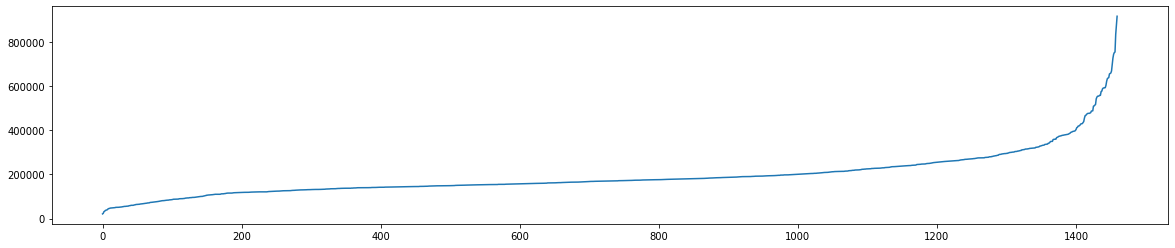

In [127]:
plt.figure(figsize=(20,4))
plt.plot(sorted(ds['SalePrice']))

<AxesSubplot:>

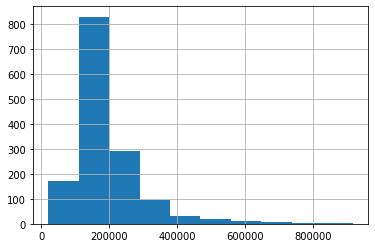

In [128]:
ds['SalePrice'].hist()

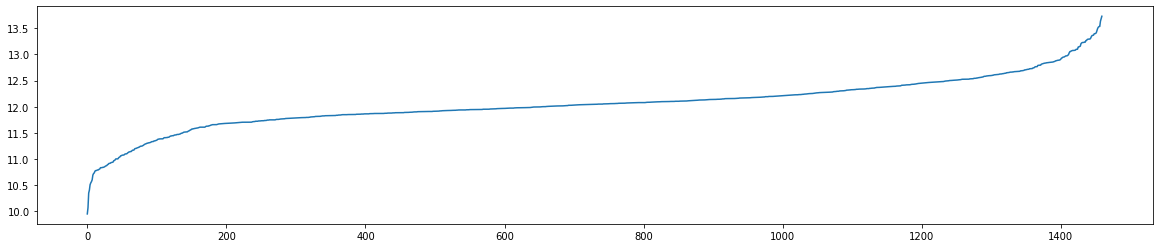

In [129]:
plt.figure(figsize=(20,4))
plt.plot(sorted(np.log(ds['SalePrice'])))

### baseline with log

In [132]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values[c])
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

29942.651986420417 0.08929053961748985


# Ensembles

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.base import BaseEstimator

In [155]:
#custom stacking

class Stacking(BaseEstimator):
    def __init__(self, estimators, final_estimator):
        self.estimators = estimators
        self.final_estimator = final_estimator


    def fit(self, X, y=None):
        for estimator in self.estimators:
            estimator[1].fit(X, y)

        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        self.final_estimator.fit(pred_features, y)

    def predict(self, X):            
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.predict(pred_features)

In [156]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100,random_state=42)),
    ('gbdt', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.6,max_depth=1, random_state=0)),
    ('knn', KNeighborsRegressor(n_neighbors=21))
]
final_estimator = LinearRegression() # meta

In [157]:
baseline_estimator = Stacking(estimators, final_estimator)

In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values[c])
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
#     baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator = Stacking(estimators, final_estimator)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

---
# No leakage target encoding

In [137]:
ds = pd.read_csv('kaggle_houseprices_modified.csv')

ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   198075.0  
1   2007        WD         Normal   199650.0  
2   2008        WD         Normal   212325.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   237500.0  

[5 rows x 81 columns]

!pip install target-encoder

In [141]:
train_ds = ds.iloc[:1200].copy()  # random shuffle
test_ds = ds.iloc[1200:].copy()  # random shuffle

In [142]:
train_ds['MSZoning-tgt'] = train_ds.groupby(['MSZoning'])['SalePrice'].transform('mean')

In [145]:
train_ds[['MSZoning-tgt', 'MSZoning']].tail()

MSZoning-tgt MSZoning
1195  205860.996300       RL
1196  205860.996300       RL
1197  128723.156742       RM
1198  205860.996300       RL
1199  205860.996300       RL

In [149]:
ms_tsg = train_ds.groupby(['MSZoning'])['SalePrice'].mean().reset_index()

In [152]:
ms_tsg.columns =  ['MSZoning', 'MSZoning-tgt'] # save as pickle or in csv
ms_tsg.head()

MSZoning   MSZoning-tgt
0  C (all)   73058.744444
1       FV  250832.118182
2       RH  127668.950000
3       RL  205860.996300
4       RM  128723.156742

In [153]:
test_ds = test_ds.merge(ms_tsg)
test_ds[['MSZoning', 'MSZoning-tgt']].tail()

MSZoning   MSZoning-tgt
255       FV  250832.118182
256       FV  250832.118182
257       FV  250832.118182
258       FV  250832.118182
259  C (all)   73058.744444